<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#lib-load" data-toc-modified-id="lib-load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>lib load</a></span></li><li><span><a href="#Fi-ext-list" data-toc-modified-id="Fi-ext-list-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fi ext list</a></span></li><li><span><a href="#Qubit-def" data-toc-modified-id="Qubit-def-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Qubit def</a></span></li></ul></div>

assymetry
dispesive shift for e and 2e
T1


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## lib load

In [3]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
import numpy as np

from ACqubit import *
from ACstate import *
from wavefunction1d import *

#from tqdm import tqdm, tqdm_notebook
from tqdm.autonotebook import tqdm

pi = np.pi

D:\anaconda\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


## Fi ext list

In [51]:
    Nfi_ext = 101
    fi_ext_min, fi_ext_max = [-0*pi, 2*pi]
    fi_ext_list = np.linspace(fi_ext_min, fi_ext_max, Nfi_ext)[:]
    dfi_ext = ( fi_ext_max - fi_ext_min ) /Nfi_ext

## Qubit def

In [4]:


J1 = 40
J2 = 1*J1+3

ACQ084 = ACQubit (E_CL = 8, 
              E_L = 1.5, 
              E_J = (J1+J2)/2, 
              E_C = 14,
              dE_J = (J2-J1)/2 )

bands = [0,1,2]
  #  fig ,ax_spec, axes, axes2 = ACQB15.plot_bands_Psi(fi_ext_list = fi_ext_list, ng_list = [  0.5], bands = bands)    


<IPython.core.display.Javascript object>


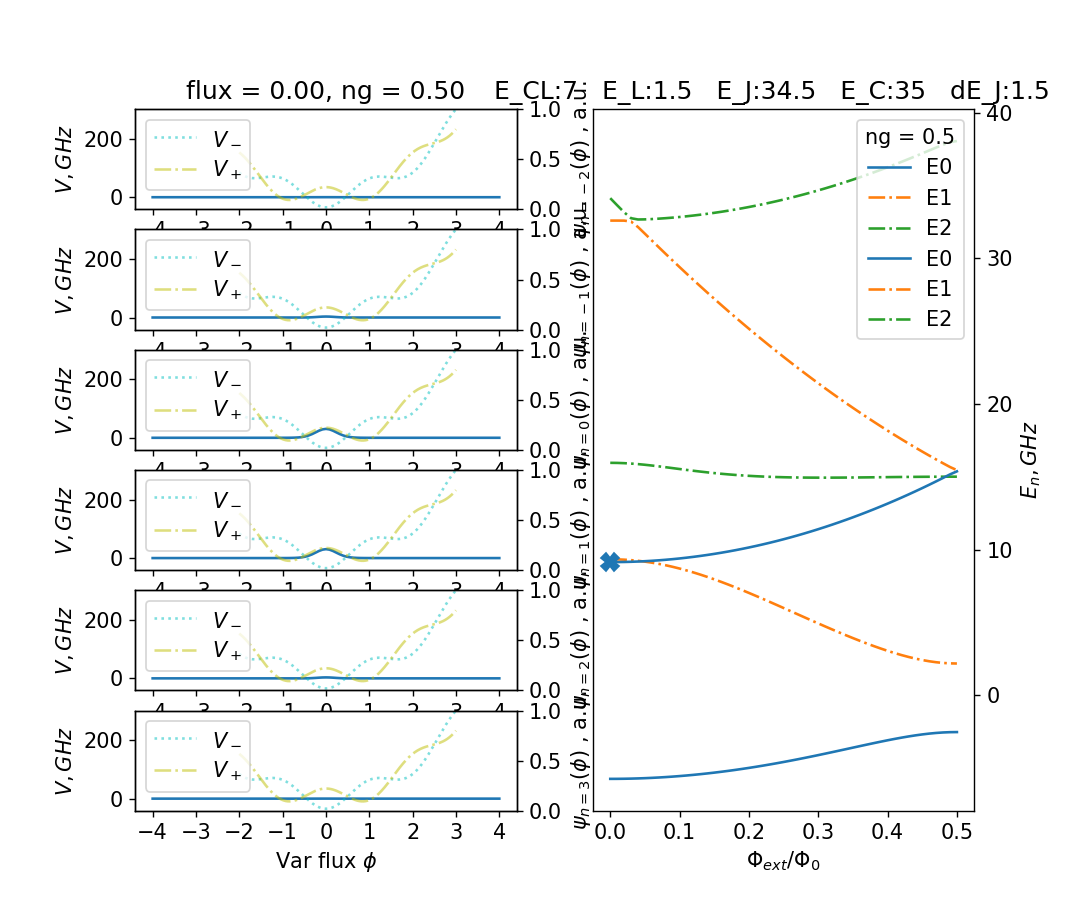

D:\anaconda\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(<Figure size 1500x1000 with 13 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x24120de8550>])

In [8]:
ACQ084.plot_bands_Psi(  fi_ext_list, [0, 0.5],  bands )

<IPython.core.display.Javascript object>


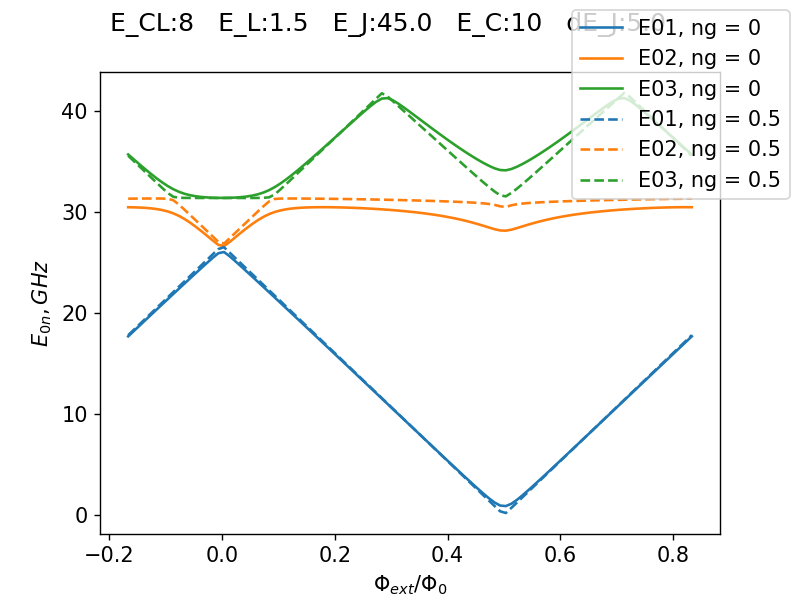

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x241392b2f60>)

In [96]:
ACQ084.plot_spectrum(fi_ext_list = fi_ext_list, ng_list = [ 0, 0.5 ], bands = [[1,2,3]]) 

<IPython.core.display.Javascript object>


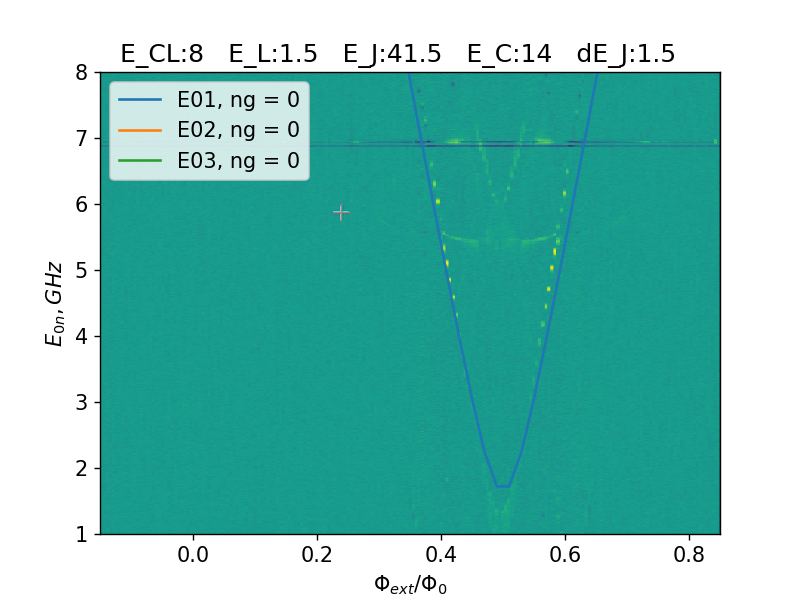

(1, 8)

In [136]:
fig, ax = plt.subplots()

im = plt.imread('ACQ84_spec.png')
ax.imshow(im, zorder=0, extent=[-0.15, 1.7/2, 1, 8],  aspect='auto')

ACQ084.plot_spectrum(fi_ext_list = fi_ext_list, ng_list = [ 0], bands = [[1,2,3]], ax = ax ) 

ax.set_ylim((1, 8))



<IPython.core.display.Javascript object>


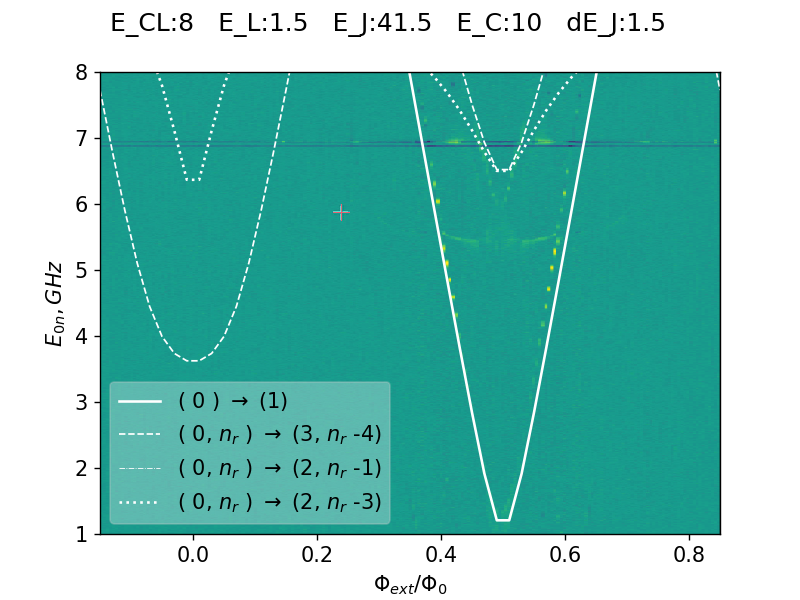

In [127]:
Nfi_ext = 51
fi_ext_min, fi_ext_max = [-0.3*pi, 1.7*pi]
fi_ext_list = np.linspace(fi_ext_min, fi_ext_max, Nfi_ext)
dfi_ext = ( fi_ext_max - fi_ext_min ) /Nfi_ext

ng_list = [0.0]
bands = [[1,2]]#, [1,2, 3]]#, [1,2,3] ]
hw = 6.7
hwL = 11.1
N_hw = range(-1,2)

trs = [[ '01', '0', '0'    ],
#        [ '02', '0', '0'    ],
       [ '03', '-4', '0'    ],
       [ '02', '-1', '0'    ],
#       [ '02', '-1', '0'    ],
#        [ '02', '+1', '0'    ],
#             [ '02', '-1', '+1'    ],
       [ '02', '-3', '0'    ]]

#trs = [[ '01', '-2', '0'    ]]

fig, ax = plt.subplots()

im = plt.imread('ACQ84_spec.png')
ax.imshow(im, zorder=0, extent=[-0.15, 1.7/2, 1, 8],  aspect='auto')
ax.set_ylim((1, 8))



fig.suptitle( ACQ084.label )
ax.set_xlabel ('$\\Phi_{ext}/\\Phi_0$')
ax.set_ylabel ('$E_{0n}, GHz$')


styles = cycle( ['-', '--', '-.', ':'])
widths = cycle( [1.5, 1, 0.5])

ng = 0.0

plt.gca().set_prop_cycle(None)
Espec = ACQ084.iterate_fi( fi_ext_list, ng, 'get_E')  

for tr in trs:
    mpl.rcParams['lines.linestyle'] = next(styles)
    mpl.rcParams['lines.linewidth'] = next(widths)
    
    ij = np.array([ int(s) for s in tr[0] ])

    E_ = Espec[:, ij[1]] - Espec[:, ij[0]]

    n_hw = int(tr[1])
    n_hwL = int(tr[2])
    
    lab_text = f'( {ij[0]} ) $\\rightarrow$ ({ij[1]})'
    if tr[1] != '0': lab_text = f'( {ij[0]}, $n_r$ ) $\\rightarrow$ ({ij[1]}, $n_r$ {tr[1]})'
    if tr[2] != '0': lab_text = f'( {ij[0]}, $n_r$, $n_L$  ) $\\rightarrow$ ({ij[1]}, $n_r${tr[1]}, $n_L$ {tr[2]})'
    
    ax.plot(fi_ext_list/2/pi, abs(E_ + n_hw * hw + n_hwL * hwL),'w', label = lab_text )
 

ax.legend(framealpha = 0.3)


In [6]:
    Nfi_ext = 101
    fi_ext_min, fi_ext_max = [-np.pi*0.3, 3.7*np.pi]
    fi_ext_list = np.linspace(fi_ext_min, fi_ext_max, Nfi_ext)[:]
    dfi_ext = ( fi_ext_max - fi_ext_min ) /Nfi_ext

<IPython.core.display.Javascript object>


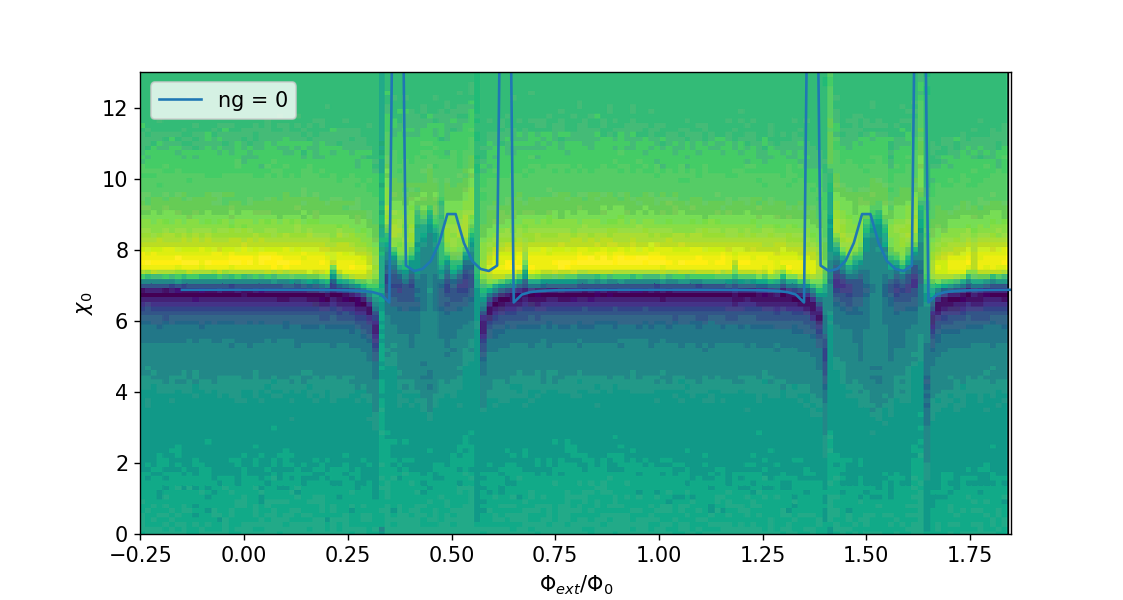

In [10]:
fig, ax = plt.subplots()

im = plt.imread('ACQ84_flux.png')
ax.imshow(im, zorder=0, extent=[-.5/2, 3.7/2, 0, 13],  aspect='auto')
ax.set_ylim((0, 13))


# ACQ084.plot_psi_ij( fi_ext_list = fi_ext_list, ng_list = [0],  i = 0 ,j = 1 )
ACQ084.plot_chi_i( fi_ext_list = fi_ext_list, ng_list = [0],  i = 0 ,freq = 6.9, ax = ax )